In [2]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("imgs/private/hijab2.JPG")

# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

I found 4 face(s) in this photograph.
A face is located at pixel location Top: 178, Left: 354, Bottom: 374, Right: 551
A face is located at pixel location Top: 249, Left: 916, Bottom: 363, Right: 1030
A face is located at pixel location Top: 564, Left: 132, Bottom: 643, Right: 211
A face is located at pixel location Top: 289, Left: 606, Bottom: 453, Right: 770


I found 4 face(s) in this photograph.


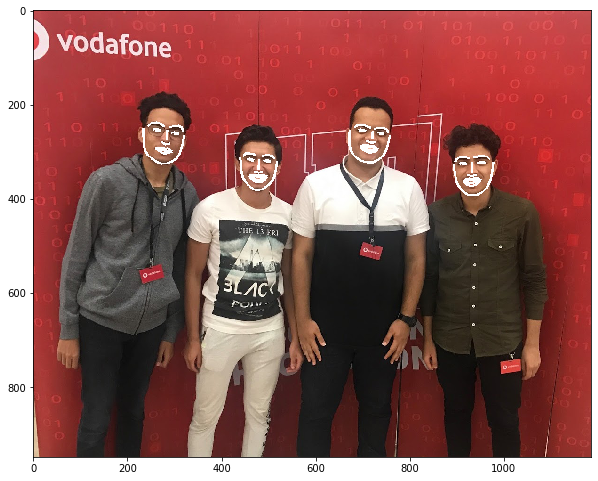

In [18]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("imgs/all.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    '''for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))
    '''
    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(pil_image)
plt.show()
pil_image.show()